# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Belén Llanquilef Navarro

* __Rol__: 201511503-6

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

¿Cómo se distribuyen los datos?

Como se ve a continuación, utilizando se aprecia que no hay correlaciones significativas fuera de la diagonal

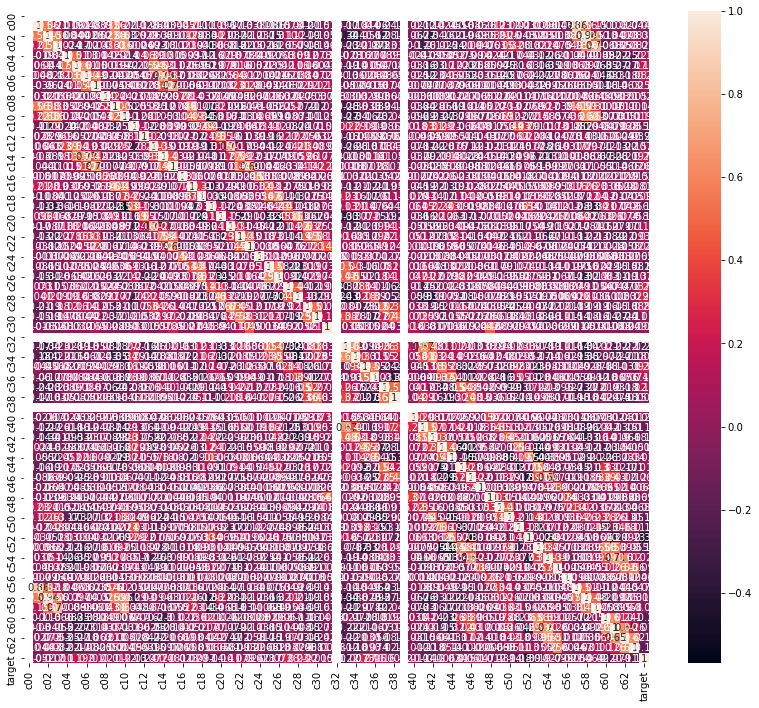

In [6]:
#correlación de pearson y mapa de calor
corr_df = digits.corr(method='pearson')
plt.figure(figsize=(14, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

¿Cuánta memoria estoy utilizando? ¿Qué tipo de datos son?

Como se observa a continuación, se está utilizando 456.4 KB y lo datos son enteros.

In [7]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

¿Cuántos registros por clase hay?

A continuación se muestran los registros por clase y si es que hay valores nulos.

In [8]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [9]:
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

In [10]:
#comprobación
frames = []

for col in digits.columns:
    aux_df = resumen_por_columna(digits,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(digits)

displaydf(df_info.transpose(), cols = 65, rows = 4)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
columna,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
unicos,1,9,17,17,17,17,17,16,3,17,17,17,17,17,17,13,3,17,17,17,17,17,17,8,2,16,17,17,17,17,16,2,1,15,17,17,17,17,15,1,5,17,17,17,17,17,17,7,4,15,17,17,17,17,17,12,2,10,17,17,17,17,17,17,10
vacios,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% vacios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


True

¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Se aprecia que los datos están limpios, sin valores nulos y listos para trabajar

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

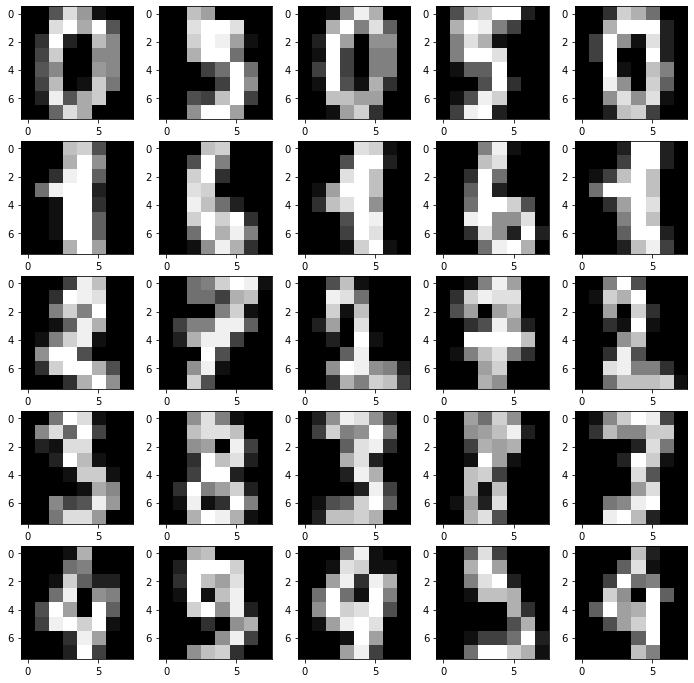

In [12]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
p=0;
for i in range(5):
    for r in range(5):
        axs[r,i].imshow(digits_dict["images"][p],cmap='gray')
        p+=1

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Train-test

In [14]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [15]:
# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
print("X_train:",X_train)
print("X_test:",X_test)
print("Y_train:",Y_train)
print("Y_test:",Y_test)

X_train: [[ 0  0  3 ... 13  4  0]
 [ 0  0  9 ...  3  0  0]
 [ 0  0  0 ...  6  0  0]
 ...
 [ 0  0  9 ... 16  2  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  1 ...  1  0  0]]
X_test: [[ 0  0  0 ... 14  5  0]
 [ 0  0 11 ...  1  0  0]
 [ 0  0  8 ...  8  0  0]
 ...
 [ 0  0  7 ... 10  0  0]
 [ 0  0  7 ... 16  4  0]
 [ 0  0 14 ...  5  0  0]]
Y_train: [6 0 0 ... 2 7 1]
Y_test: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4

# Modelos y métricas

Método 1: Logistic Regression

In [17]:
# Creando el modelo
rlog = LogisticRegression(solver='newton-cg', max_iter=2000)
rlog.fit(X_train, Y_train) # ajustando el modelo

LogisticRegression(max_iter=2000, solver='newton-cg')

In [18]:
rlog.score(X_train,Y_train)

1.0

In [19]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


In [20]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores :")
print("")
df_metrics


Metricas para los regresores :



,accuracy,recall,precision,fscore
0,0.9722,0.9744,0.9736,0.9739


Método 2: MLPClassifier

In [21]:
from sklearn.neural_network import MLPClassifier

# Creando el modelo
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1)
clf.fit(X_train, Y_train) # ajustando el modelo

MLPClassifier(alpha=1e-05, random_state=1)

In [22]:
clf.score(X_train,Y_train)

1.0

In [23]:
y_true2 =  list(Y_test)
y_pred2 = list(clf.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true2,y_pred2))


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


In [24]:
df_temp2 = pd.DataFrame(
    {
        'y':y_true2,
        'yhat':y_pred2
        }
)

df_metrics2 = summary_metrics(df_temp2)
print("\nMetricas para los regresores : ")
print("")
df_metrics2


Metricas para los regresores : 



,accuracy,recall,precision,fscore
0,0.9778,0.9778,0.9791,0.9784


Método 3: K-Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Creando el modelo
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train) # ajustando el modelo

KNeighborsClassifier(n_neighbors=1)

In [26]:
model.score(X_train,Y_train)

1.0

In [27]:
y_true3 =  list(Y_test)
y_pred3 = list(model.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true3,y_pred3))


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 28  1]
 [ 0  0  0  1  1  1  0  0  0 37]]


In [28]:
df_temp3 = pd.DataFrame(
    {
        'y':y_true3,
        'yhat':y_pred3
        }
)

df_metrics3 = summary_metrics(df_temp3)
print("\nMetricas para los regresores : ")
print("")
df_metrics3


Metricas para los regresores : 



,accuracy,recall,precision,fscore
0,0.9778,0.9786,0.9783,0.9781


¿Cuál modelo es mejor basado en sus métricas?
EL método 2: MLPClassifier es superior en cuanto a métricas a los demás.
    
¿Qué modelo escoges?
método 2: MLPClassifier

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

Cross validation

In [74]:
#cross_val_score n_fold=10
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=model,
                            X=X_train,
                            y=Y_train,
                            cv=10)

ValueError: Found input variables with inconsistent numbers of samples: [16346, 1437]

In [30]:
#intervalo de confianza
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.99, 0.99, 0.99, 0.98, 0.98, 1.0, 0.99, 0.99, 0.98, 0.98] 
Precision promedio:  0.987 +/-  0.006


Curva de Validación

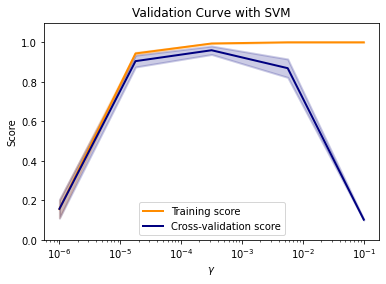

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

Curva AUC–ROC

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
# graficar curva roc
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [34]:
# separar clase 0 del resto
X = digits.drop(columns='target')
Y = digits['target'].apply(lambda x: 1 if x ==2 else 0)
model =  MLPClassifier(solver='adam', alpha=1e-5, random_state=1)

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2)

# ajustar modelo 
model.fit(X_train,Y_train)

MLPClassifier(alpha=1e-05, random_state=1)

In [35]:
# calcular score AUC
probs = model.predict_proba(X_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(Y_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

AUC: 1.00


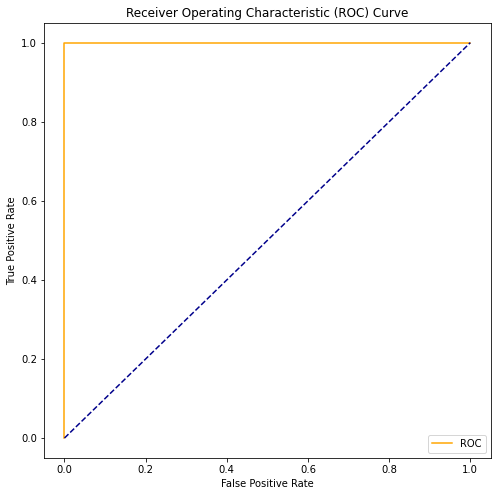

In [36]:
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


Selección de atributos

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [38]:
# Separamos las columnas objetivo
x_training = digits.drop(['target',], axis=1)
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [39]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['c10',
 'c13',
 'c20',
 'c21',
 'c26',
 'c28',
 'c30',
 'c33',
 'c34',
 'c36',
 'c42',
 'c43',
 'c46',
 'c60',
 'c61']

Extracción de atributos

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from metrics_classification import summary_metrics

In [41]:
%%timeit
# Entrenamiento con todas las variables 
X = digits.drop('target',axis = 1)
Y = digits['target']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
rlog = MLPClassifier(solver='adam', alpha=1e-5, random_state=1)
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s1 = summary_metrics(df_pred).assign(name = 'Todas las variables')

2.25 s ± 45.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
# Entrenamiento con todas las variables 
X = digits.drop('target',axis = 1)
Y = digits['target']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
rlog = MLPClassifier(solver='adam', alpha=1e-5, random_state=1)
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s1 = summary_metrics(df_pred).assign(name = 'Todas las variables')

In [43]:
%%timeit
# Entrenamiento con las variables seleccionadas
X = digits[atributos]
Y = digits['target']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
rlog = MLPClassifier(solver='adam', alpha=1e-5, random_state=1)
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s2 = summary_metrics(df_pred).assign(name = 'Variables Seleccionadas')

C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\EstebanSaez\anaconda3\lib\site-packages

2.7 s ± 70.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# Entrenamiento con las variables seleccionadas
X = digits[atributos]
Y = digits['target']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
rlog = MLPClassifier(solver='adam', alpha=1e-5, random_state=1)
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s2 = summary_metrics(df_pred).assign(name = 'Variables Seleccionadas')

C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
# juntar resultados en formato dataframe
pd.concat([df_s1,df_s2])

,accuracy,recall,precision,fscore,name
0,0.9611,0.9602,0.9611,0.9602,Todas las variables
0,0.9444,0.9462,0.9452,0.9441,Variables Seleccionadas


Como se aprecia anteriormente, al pasar de 65 atributos a 15 prácticamente no cambian los resultados de las métricas, pero sí es posbile ahorrarse tiempo de ejecución (de 2.96 s ± 89 ms a 2.41 s ± 86.2 ms per loop).

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [46]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_pred = np.array(y_pred)
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(16,16))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

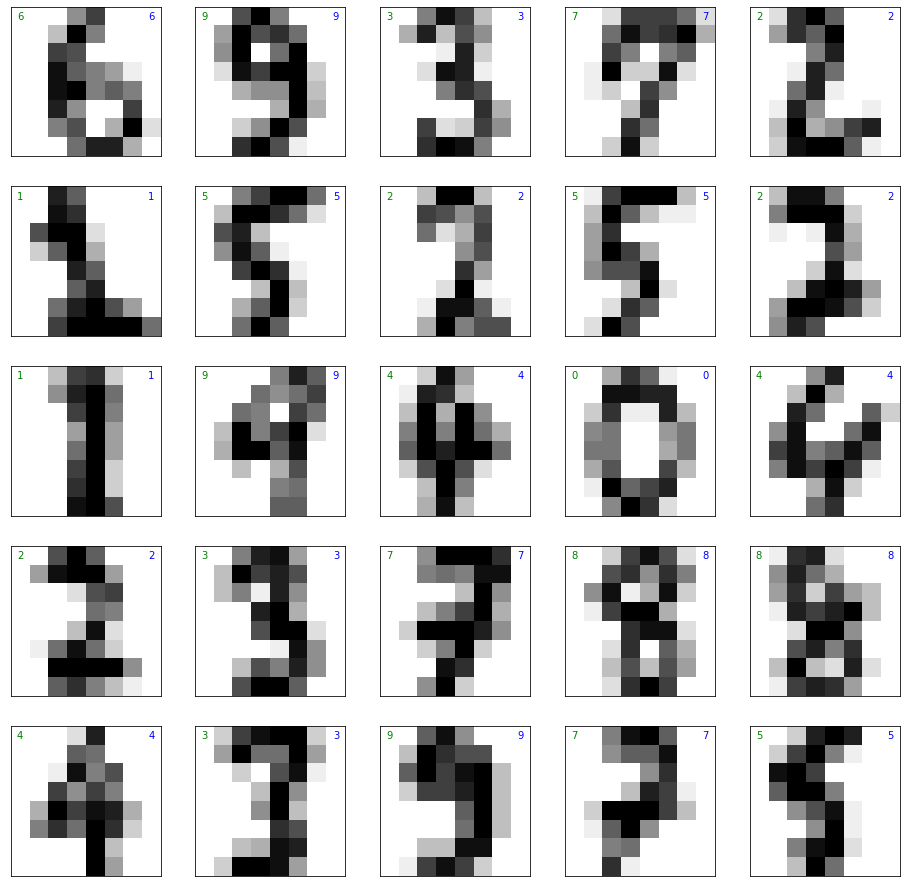

In [47]:
mostar_resultados(digits,model=MLPClassifier(solver='adam', alpha=1e-5, random_state=1),nx=5, ny=5,label = "correctos")

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Se aprecia en las gráficas que el valor predicho y el orginal son el mismo para todos los casos.
Cuando los valores predichos y originales son distintos es debido a que el modelo no se ajustó correctamente a los datos y se debería probar con otros modelos.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [48]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1. Definición del problema

El problema que se debe resolver es que a partir de los datos de una vivienda, el modelo debe ser capaz de predecir el costo de ella.

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [51]:
#comprobación
frames = []

for col in housing.columns:
    aux_df = resumen_por_columna(housing,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(housing)
df_info

,columna,unicos,vacios,% vacios
0,longitude,844,0,0.000000
1,latitude,862,0,0.000000
2,housing_median_age,52,0,0.000000
3,total_rooms,5926,0,0.000000
4,total_bedrooms,1924,207,0.010029
5,population,3888,0,0.000000
6,households,1815,0,0.000000
7,median_income,12928,0,0.000000
8,median_house_value,3842,0,0.000000
9,ocean_proximity,5,0,0.000000


## 2. Estadística descriptiva

In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Visualización descriptiva

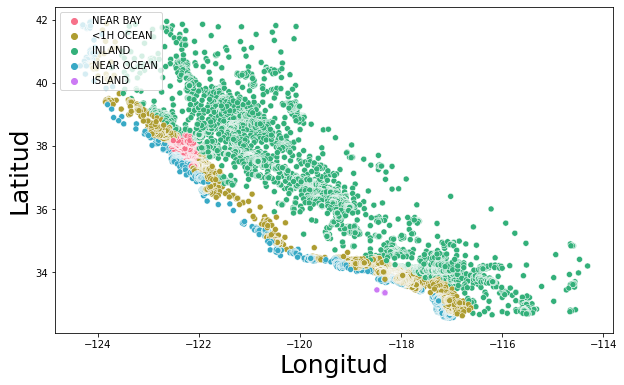

In [53]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='ocean_proximity',# color por label
    data=housing,
    ci = None,
    palette='husl'
)   
plt.xlabel('Longitud', size=25)
plt.ylabel('Latitud',size=25)
plt.legend(loc='upper left')
plt.show()

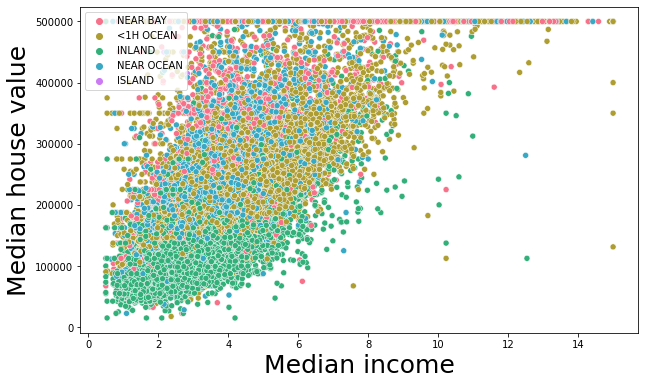

In [54]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.scatterplot(
    x='median_income',
    y='median_house_value',
    hue='ocean_proximity',# color por label
    data=housing,
    ci = None,
    palette='husl'
)   
plt.xlabel('Median income', size=25)
plt.ylabel('Median house value',size=25)
plt.legend(loc='upper left')
plt.show()

## 4. Preprocesamiento

In [55]:
housing.dtypes.tolist()
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
housing=housing.dropna()
housing.replace({'NEAR BAY':1,
                             '<1H OCEAN':2,
                             'INLAND':3,
                             'NEAR OCEAN':3,
                             'ISLAND':5},
               inplace=True          )
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


## 5. Selección de modelo

In [57]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import neighbors

In [58]:
#comprobación
frames = []

for col in housing.columns:
    aux_df = resumen_por_columna(housing,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames)#.reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(housing)
df_info

,columna,unicos,vacios,% vacios
0,longitude,844,0,0.0
0,latitude,861,0,0.0
0,housing_median_age,52,0,0.0
0,total_rooms,5911,0,0.0
0,total_bedrooms,1923,0,0.0
0,population,3879,0,0.0
0,households,1809,0,0.0
0,median_income,12825,0,0.0
0,median_house_value,3833,0,0.0
0,ocean_proximity,4,0,0.0


In [59]:
X = housing.drop("median_house_value", axis=1)
y = housing.median_house_value.values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

### Modelos sin hiperparámetros

#### Modelo 1: DecisionTreeRegressor

In [61]:
# Creando el modelo

regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train,np.array(y_train.ravel()).astype(int))

y_pred=regressor.predict(X_test)
classifier_r2_score = r2_score(y_test, y_pred)

print(classifier_r2_score)

0.6359416586043289


#### Modelo 2: LinearRegression

In [62]:
regressor1 =linear_model.LinearRegression()
regressor1.fit(X_train,np.array(y_train.ravel()).astype(int))
y_pred1=regressor1.predict(X_test)
classifier_r2_score1 = r2_score(y_test, y_pred1)

print(classifier_r2_score1)

0.6428072437524783


#### Modelo 3: KNeighborsRegressor

In [63]:
regressor2 =neighbors.KNeighborsRegressor()
regressor2.fit(X_train,np.array(y_train.ravel()).astype(int))
y_pred2=regressor2.predict(X_test)
classifier_r2_score2 = r2_score(y_test, y_pred2)

print(classifier_r2_score2)

0.27473534339937233


#### Modelo 4: RandomForestRegressor

In [64]:
from sklearn import tree, linear_model, ensemble, neighbors

regressor3 =ensemble.RandomForestRegressor()
regressor3.fit(X_train,np.array(y_train.ravel()).astype(int))
y_pred3=regressor3.predict(X_test)
classifier_r2_score3 = r2_score(y_test, y_pred3)

print(classifier_r2_score3)

0.8116271108374264


### Modelos con hiperparámetros optimizados

B. Al menos tres de estos modelos tienen que tener hiperparámetros.

C. Realizar optimización de hiperparámetros.

#### Modelo 1: DecisionTreeRegressor

In [65]:
# Creando el modelo

regressor = tree.DecisionTreeRegressor(max_depth=9,min_samples_leaf=30,random_state=100)
regressor.fit(X_train,np.array(y_train.ravel()).astype(int))

y_pred=regressor.predict(X_test)
classifier_r2_score_1 = r2_score(y_test, y_pred)

print(classifier_r2_score_1)

0.7256391897162653


#### Modelo 2: KNeighborsRegressor

In [66]:
regressor2 =neighbors.KNeighborsRegressor(n_neighbors=22, weights='distance', algorithm='brute')
regressor2.fit(X_train,np.array(y_train.ravel()).astype(int))
y_pred2=regressor2.predict(X_test)
classifier_r2_score_2 = r2_score(y_test, y_pred2)

print(classifier_r2_score_2)

0.3368342384408509


#### Modelo 3: RandomForestRegressor

In [67]:
from sklearn import tree, linear_model, ensemble, neighbors

regressor3 =ensemble.RandomForestRegressor(n_estimators=150,max_features='sqrt')
regressor3.fit(X_train,np.array(y_train.ravel()).astype(int))
y_pred3=regressor3.predict(X_test)
classifier_r2_score_3 = r2_score(y_test, y_pred3)

print(classifier_r2_score_3)

0.8198917872073406


## 6. Métricas y análisis de resultados

In [68]:
scores = pd.DataFrame(
    [
        ["Decision Tree",  classifier_r2_score],
        ["LinearRegression",classifier_r2_score1],
        ["KNeighbors",classifier_r2_score2],
        ["RandomForest",classifier_r2_score3]
    ],
    
    columns = ["Modelos", "R^2"]
)
scores

,Modelos,R^2
0,Decision Tree,0.635942
1,LinearRegression,0.642807
2,KNeighbors,0.274735
3,RandomForest,0.811627


In [69]:
scores1 = pd.DataFrame(
    [
        ["Decision Tree",  classifier_r2_score_1],
        ["KNeighbors",classifier_r2_score_2],
        ["RandomForest",classifier_r2_score_3]
    ],
    
    columns = ["Modelos", "R^2 con hiperparámetros"]
)
scores1

,Modelos,R^2 con hiperparámetros
0,Decision Tree,0.725639
1,KNeighbors,0.336834
2,RandomForest,0.819892


In [70]:
#pd.concat([scores,scores1],axis=1)
scores_total=scores.merge(scores1, how='left')

In [71]:
scores_total

,Modelos,R^2,R^2 con hiperparámetros
0,Decision Tree,0.635942,0.725639
1,LinearRegression,0.642807,NaN
2,KNeighbors,0.274735,0.336834
3,RandomForest,0.811627,0.819892


## 7. Visualizaciones del modelo

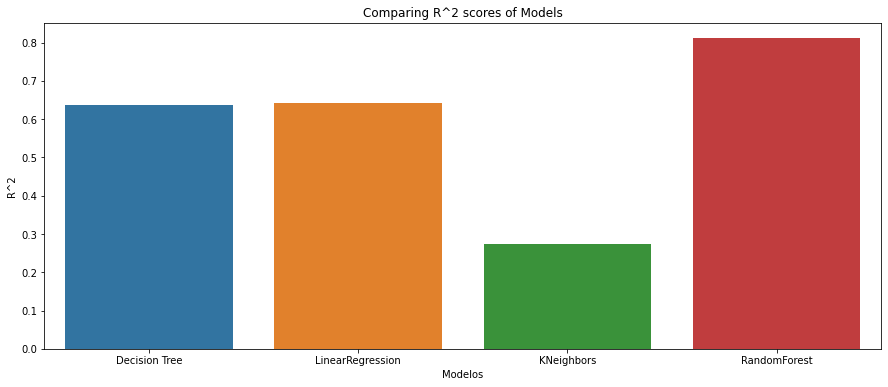

In [72]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="Modelos", y='R^2',data=scores_total)
plt.title("Comparing R^2 scores of Models")
plt.show()

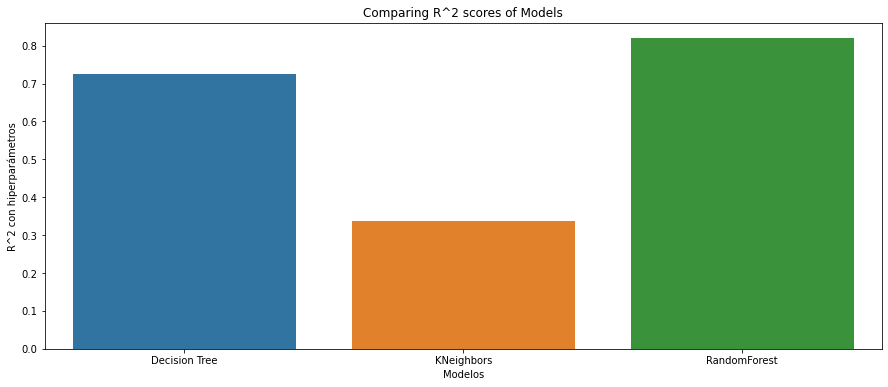

In [76]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="Modelos", y='R^2 con hiperparámetros',data=scores1)
plt.title("Comparing R^2 scores of Models")
plt.show()

## 8. Conclusiones

De los 4 modelos utilizados en la sección 5, se seleccionaron 3 para optimizar mediante el uso de hiperparámetros (Decision Tree, KNeighbors,RandomForest)

Como se puede ver en la sección 7, si bien los 3 aumentaron su R^2, se mantuvo la relación entre ellos, es decir, el modelo Random Forest tuvo el mayor R^2 con y sin el uso de hiperparámetros, seguido por el modelo DecisionTree y fianlmente el modelo KNeighbors.

Como conclusión se puede destacar que para este problema el modelo que mejor predice el costo de las casas según sus características sería el RandomForest.